# Pymaceuticals Inc.
---

#### Summary Statistics by Drug Regimen
- Capomulin and Ramicane have lower mean and median tumor volumes than Infubinol and Ceftamin, suggesting that these regimens might be more effective in reducing tumor growth.


#### Tumor Volume Analysis for Capomulin, Ramicane, Infubinol, Ceftamin
- Capomulin, Ceftamin, and Ramicane show no significant outliers, indicating that the tumor response is generally consistent across different mice. Infubinol has a potential outlier with a tumor volume of 36.32 mm³, which could indicate either a particularly good response to the treatment. 


#### Tumor Volume Distribution
- Capomulin and Ramicane have the lowest tumor volumes, reinforcing their effectiveness in tumor reduction. Infubinol and Ceftamin have a wider distribution and higher tumor volumes, showing that these treatments may be less effective or more variable in their results.


#### Tumor Volume vs. Time for a Single Mouse (l509)
- The line plot shows the progression of tumor volume over time for mouse l509 treated with Capomulin. The tumor volume decreases over time, indicating that Capomulin is effective in reducing tumor size for this mouse.


#### Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)
- The scatter plot doesn't suggest a strong correlation visually, and the correlation calculated coefficient is likely weak. This indicates that mouse weight does not significantly relate to the average tumor volume for the Capomulin regimen.


### Key Takeaways
- Capomulin and Ramicane appear to be the most effective regimens, consistently reducing tumor sizes across different mice, with fewer outliers and lower variance.
- Infubinol shows more variable results, with at least one outlier, indicating an inconsistent effect on tumor reduction.
- Ceftamin is similar to Infubinol in terms of variability and less effectiveness.
- Mouse weight does not seem to be a significant predictor of tumor volume under the Capomulin regimen, as demonstrated by the weak correlation and regression results.

**Capomulin and Ramicane should be the focus for further research as potential effective treatments for tumor reduction, while Infubinol and Ceftamin require more exploration to understand their variability.**

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(mouse_metadata, study_results, on= "Mouse ID")

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count = merge_df["Mouse ID"].nunique()
mice_count

249

In [11]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_mouse_ids = merge_df[merge_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [12]:
# Optional: Get all the data for the duplicate mouse ID.
g989_data = merge_df[merge_df["Mouse ID"] == "g989"]
g989_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [18]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merge_df[merge_df["Mouse ID"] != "g989"]
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [19]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_count = cleaned_df["Mouse ID"].nunique()
cleaned_mice_count


248

## Summary Statistics

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumor_volume = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor_volume = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_tumor_volume = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_tumor_volume = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_tumor_volume = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume Std. Dev.': std_tumor_volume,
    'Tumor Volume Std. Err.': sem_tumor_volume
})
summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [22]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg = merge_df.groupby('Drug Regimen').agg(
    mean=('Tumor Volume (mm3)', 'mean'),
    median=('Tumor Volume (mm3)', 'median'),
    var=('Tumor Volume (mm3)', 'var'),
    std=('Tumor Volume (mm3)', 'std'),
    sem=('Tumor Volume (mm3)', 'sem')
)

summary_stats_agg


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

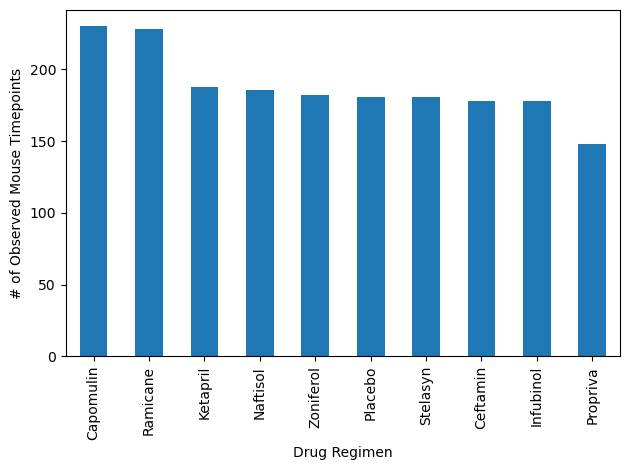

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_regimen_group = cleaned_df.groupby("Drug Regimen")

timepoint_counts = drug_regimen_group["Drug Regimen"].count().sort_values(ascending=False)

count_chart = timepoint_counts.plot(kind="bar")

count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("# of Observed Mouse Timepoints")

plt.tight_layout()
plt.show()

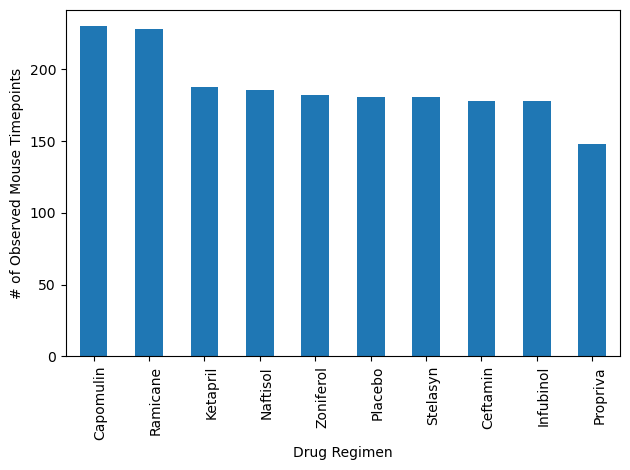

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
count_chart_pyplot = timepoint_counts.plot(kind="bar",
                                           xlabel= "Drug Regimen",
                                           ylabel="# of Observed Mouse Timepoints")

xticklabels = timepoint_counts.index
count_chart_pyplot.set_xticklabels(xticklabels, rotation_mode="anchor",
                                   ha="right", wrap=True)

plt.tight_layout()
plt.show()

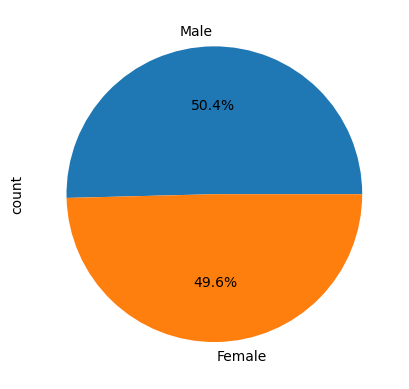

In [28]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
unique_mice_df = cleaned_df.drop_duplicates(subset=['Mouse ID'])

# Get the unique mice with their gender
gender_counts = unique_mice_df["Sex"].value_counts()

# Make the pie chart
gender_counts.plot(kind='pie', autopct='%1.1f%%')
plt.show()

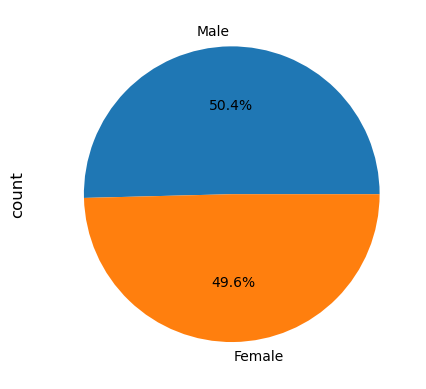

In [29]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_counts = unique_mice_df["Sex"].value_counts()

# Make the pie chart
plt.text(-1.5, 0, "count", fontsize=12, rotation=90, va='center')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')

plt.show()

## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = cleaned_df.groupby('Mouse ID')['Timepoint'].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(max_timepoints, cleaned_df, on=['Mouse ID', 'Timepoint'])

#filter to only include 4 treatments
final_tumor_volume_filtered = final_tumor_volume_df[
    (final_tumor_volume_df['Drug Regimen'] == 'Capomulin') |
    (final_tumor_volume_df['Drug Regimen'] == 'Ramicane') |
    (final_tumor_volume_df['Drug Regimen'] == 'Infubinol') |
    (final_tumor_volume_df['Drug Regimen'] == 'Ceftamin')
]

final_tumor_volume_filtered.head(10)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
10,a520,45,Ramicane,Male,13,21,38.810366,1
11,a577,30,Infubinol,Female,6,25,57.031862,2
12,a644,45,Ramicane,Female,7,17,32.978522,1
13,a685,45,Infubinol,Male,8,30,66.083066,3
19,b128,45,Capomulin,Female,9,22,38.982878,2


In [48]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

#dictionary to store tumor volume data for each treatment
tumor_volumes_dict = {}

for treatment in treatments:
    drug_data = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_volumes.append(drug_data) # append tumor volumes to list
    

# Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = drug_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']

    # add subset
    tumor_volumes_dict[treatment] = drug_data
    tumor_volumes.append(drug_data)
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]
    
    if outliers.empty:
        print(f"{treatment}'s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)")
    else:
        print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


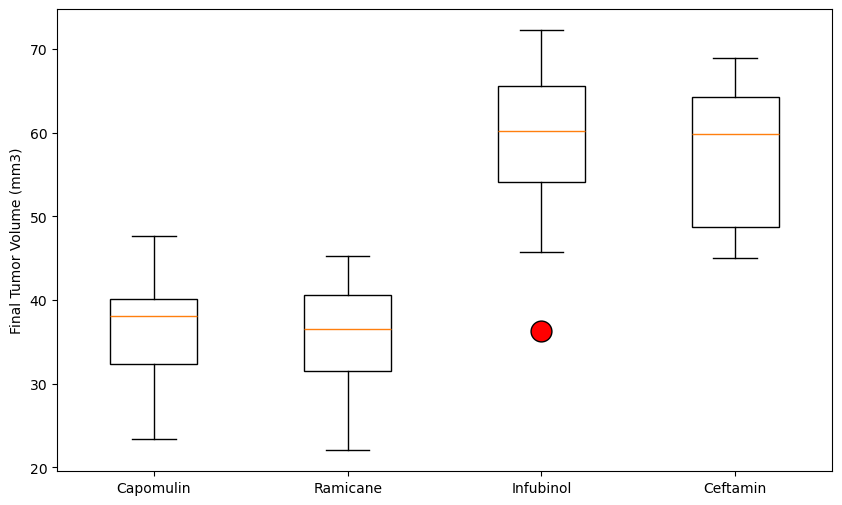

In [46]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))

box = plt.boxplot([tumor_volumes_dict[treatment] for treatment in treatments], 
                  labels=treatments, patch_artist=True,
                  flierprops=dict(marker='o', color='red', markersize=15, 
                                  markerfacecolor='red', markeredgecolor='black'))

# Customize the boxes to be white
for box_patch in box['boxes']:
    box_patch.set(facecolor='white')

plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

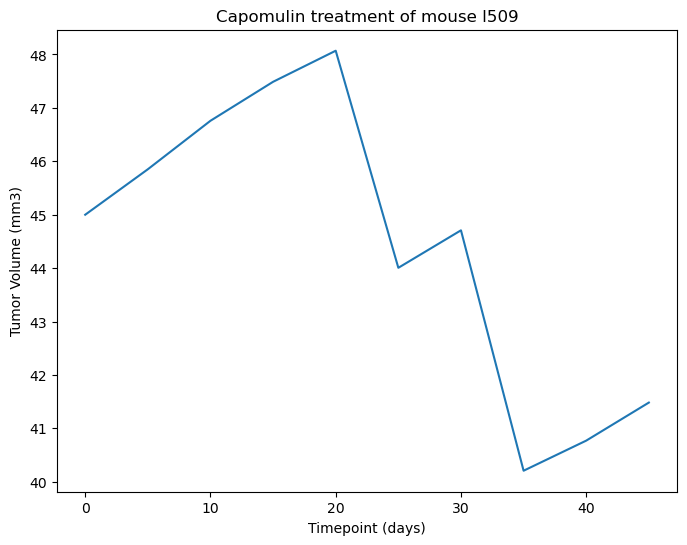

In [56]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter Mouse ID 'I509' and 'Capomulin'
l509_data = merge_df[(merge_df['Mouse ID'] == 'l509') & 
                      (merge_df['Drug Regimen'] == 'Capomulin')]

plt.figure(figsize=(8, 6))
plt.plot(l509_data['Timepoint'], l509_data['Tumor Volume (mm3)'])

plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

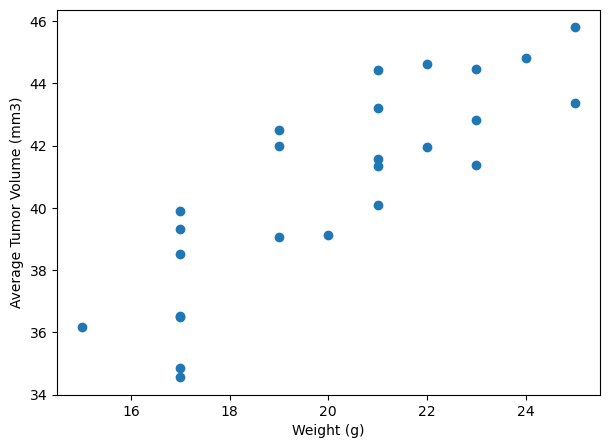

In [60]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = merge_df[merge_df['Drug Regimen'] == 'Capomulin']
# Group by Mouse ID and calculate the average tumor volume for each mouse
average_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume data with mouse weight
mouse_weight_and_volume = pd.merge(mouse_metadata, average_tumor_vol, on='Mouse ID')

# Generate the scatter plot
plt.figure(figsize=(7, 5))
plt.scatter(mouse_weight_and_volume['Weight (g)'], mouse_weight_and_volume['Tumor Volume (mm3)'])

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Correlation coefficient between mouse weight and average tumor volume: 0.84


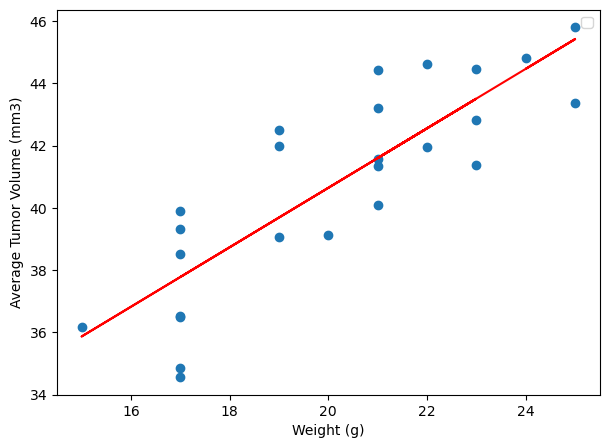

In [72]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = np.corrcoef(mouse_weight_and_volume['Weight (g)'], mouse_weight_and_volume['Tumor Volume (mm3)'])[0, 1]

print(f"Correlation coefficient between mouse weight and average tumor volume: {correlation:.2f}")

# Perform linear regression using NumPy
x = mouse_weight_and_volume['Weight (g)']
y = mouse_weight_and_volume['Tumor Volume (mm3)']

# Calculate slope and intercept
slope, intercept = np.polyfit(x, y, 1)

# Generate the scatter plot
plt.figure(figsize=(7, 5))
plt.scatter(mouse_weight_and_volume['Weight (g)'], mouse_weight_and_volume['Tumor Volume (mm3)'])

#linear regression line
plt.plot(x, slope * x + intercept, color='red')


plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()

plt.show()
